### Robustness check - debt

In [90]:
import calculate_return as cr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('seaborn')

### How is pi affected by increasing interest rates?

In [40]:
rfs = np.round(np.arange(0.02, 0.07, 0.005), 4)
rms = np.arange(0.023, 0.09, 0.005)

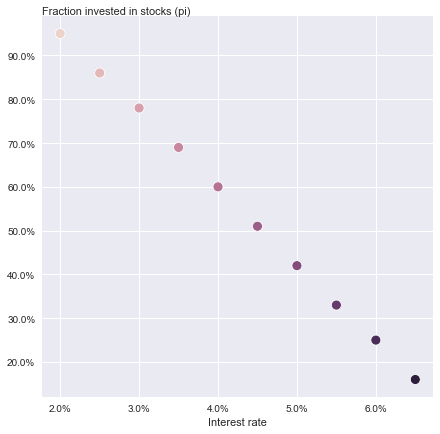

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(y=[round(cr.pi_arr(rate, 2, 0.02837, 0.076, 0.002)*100, 0) for rate in rfs], x=rfs*100, hue=rfs, legend=False, s=100)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: "{:}%".format(x)))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: "{}%".format(y)))
ax.set_ylabel('Fraction invested in stocks (pi)', loc='top', rotation=0, labelpad=-183)
ax.set_xlabel('Interest rate')
fig.savefig('Robustness/pi_cost_of_debt.png')
#sns.lineplot(y=[cr.pi_arr(rate, 2, 0.02837, 0.076, 0.002) for rate in rms], x=rms)

### Effect on performance

In [109]:
ports2 = cr.fetch_returns('garch', range(10000), YEARLY_RM = 0.02)
ports3 = cr.fetch_returns('garch', range(10000), YEARLY_RF=0.02, YEARLY_RM=0.03)
ports4 = cr.fetch_returns('garch', range(10000), YEARLY_RF=0.02, YEARLY_RM=0.04)
ports5 = cr.fetch_returns('garch', range(10000), YEARLY_RF=0.02, YEARLY_RM=0.05)

In [110]:
data=ports2.loc[:, ["dual_phase"]]
data.columns=['2% margin rate']
data["3% margin rate"]=ports3["dual_phase"]
data["4% margin rate"]=ports4["dual_phase"]
data["5% margin rate"]=ports5["dual_phase"]

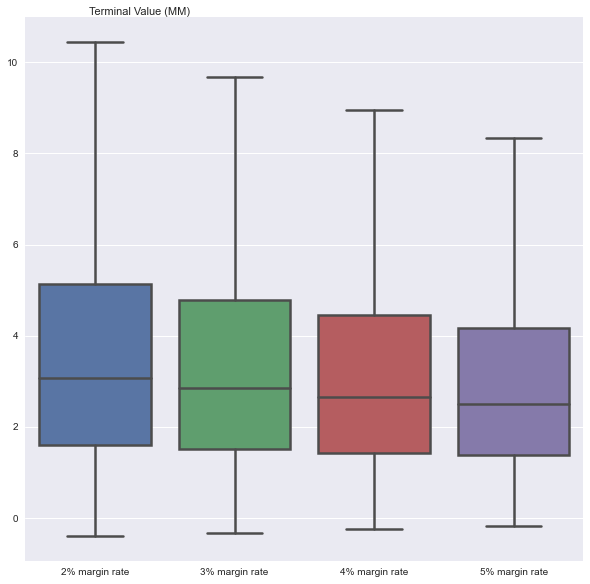

In [111]:
x = data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("Terminal Value (MM)", loc='top', rotation=0, labelpad=-183)
plt.xlabel("")
plt.ticklabel_format(style='plain', axis='y',useOffset=True)
plt.savefig("Robustness/boxplot_higher_margin_rate.png", bbox_inches = 'tight', pad_inches = 0.1)